In [73]:
import numpy as np, cv2
from matplotlib import pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True

(-0.5, 1499.5, 1999.5, -0.5)

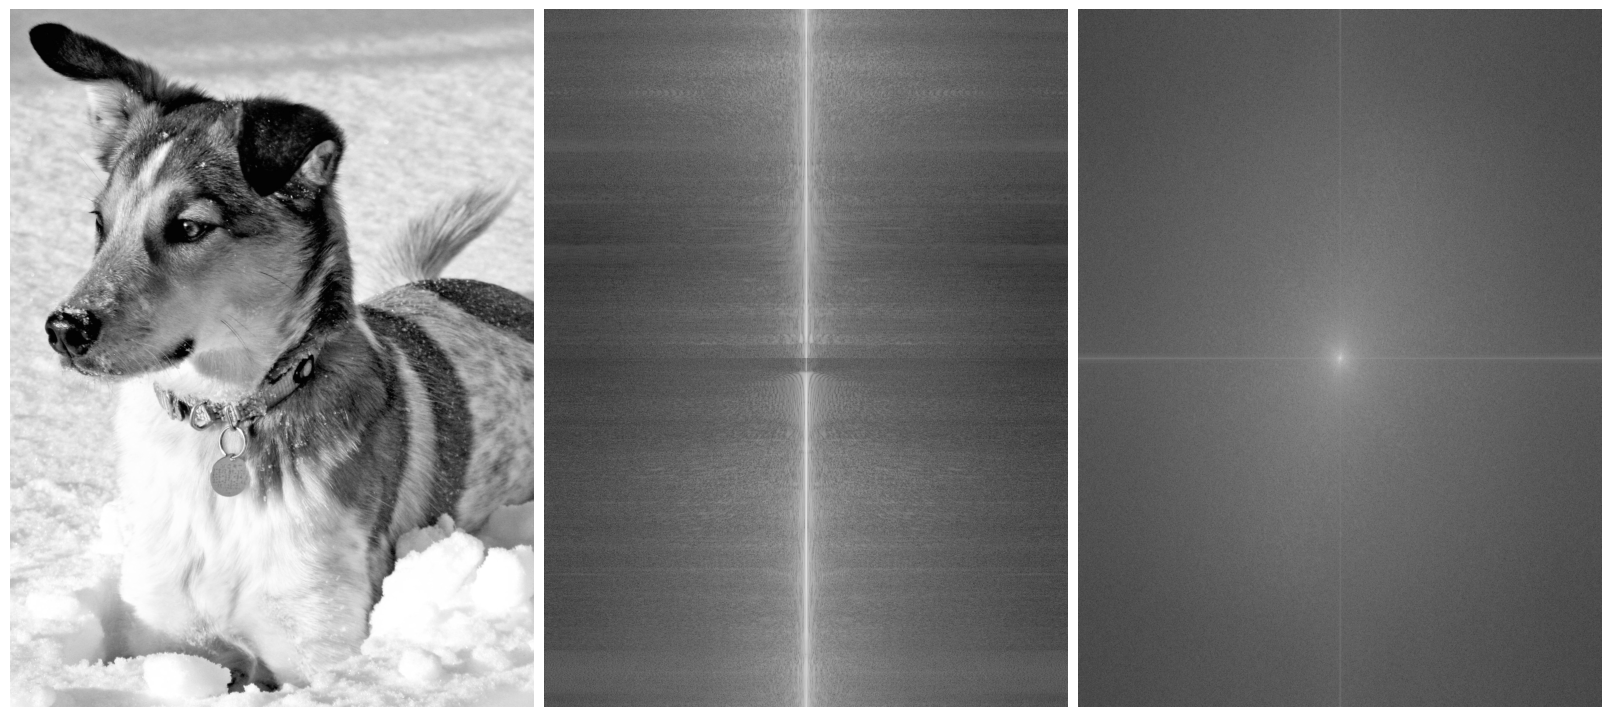

In [127]:
img = np.array(cv2.imread(r'../media/dog.jpg', 0), float)
h,w = img.shape

fft_axis = 1
proc = lambda x: np.log(np.abs(np.fft.fftshift(x)) + 1)
fft_row = np.fft.fft(img, img.shape[fft_axis], axis=fft_axis)

fig = plt.figure(figsize = (16,9), layout="constrained")

axis0 = fig.add_subplot(131)
a0 = axis0.imshow(img, 'grey')
axis1 = fig.add_subplot(132)
a1 = axis1.imshow(proc(fft_row), 'grey')

#plt.colorbar(a1)

fft_axis = not fft_axis
fft_col = np.fft.fft(fft_row, img.shape[fft_axis], axis=fft_axis)

axis2 = fig.add_subplot(133)
a2 = axis2.imshow(proc(fft_col), 'grey')
#plt.colorbar(a2)

axis0.axis('off')
axis1.axis('off')
axis2.axis('off')



(2000, 1500)


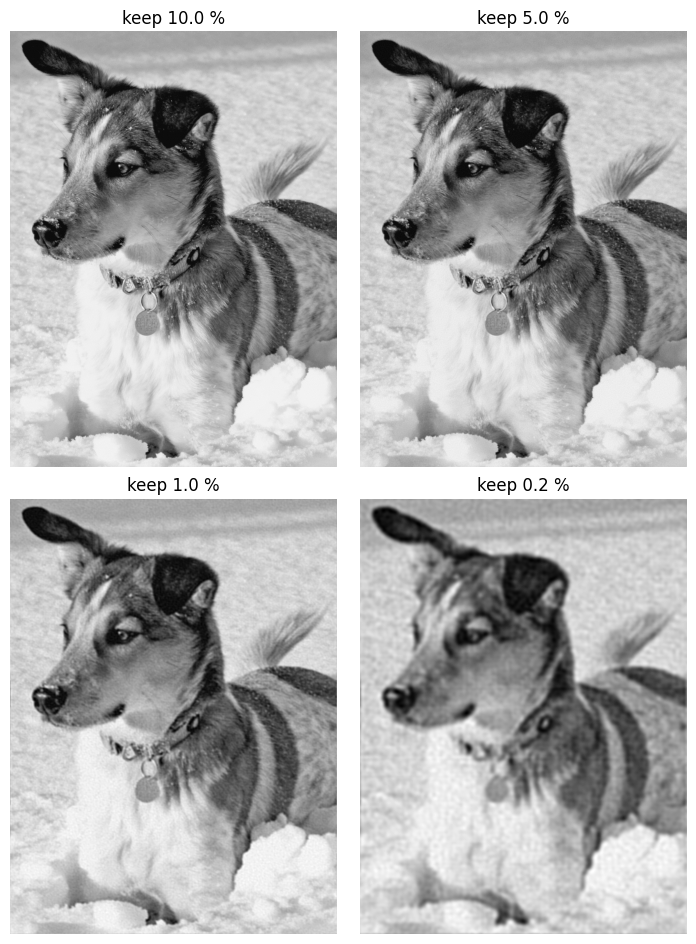

In [132]:
fft_2D          = np.fft.fft2(img)#;print(fft_2D.shape)
fft_2D_abs      = np.absolute(fft_2D)#;print(fft_2D_abs.shape)
freqs_sorted    = np.sort(fft_2D_abs.reshape(-1))
n_endries       = len(freqs_sorted)
#plt.plot(np.log(freqs_sorted))
freqs_keep_top      = np.array([0.1, 0.05, 0.01, 0.002])
freqs_drop_lowest   = 1 - freqs_keep_top
idx_drop_lowest     = np.array(freqs_drop_lowest*n_endries, int)

print(img.shape)

aspect = h/w

fig_width = 7
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(fig_width, fig_width*aspect))
ax = ax.flatten()

for i,th_idx in enumerate(idx_drop_lowest):
    threshold = freqs_sorted[th_idx]
    mask = fft_2D_abs>threshold     # determine which values ar higher then threshold
    fft_2D_clean = fft_2D*mask      # element wise multiplication. small elements mult by 0.
    #print(th_idx,threshold,mask.shape,fft_2D_clean.shape)
    img_clean = np.fft.ifft2(fft_2D_clean).real
    ax[i].imshow(img_clean, cmap='gray')
    ax[i].axis('off') 
    ax[i].set_title(f'keep {freqs_keep_top[i] * 100} %')


#plt.imshow(proc(fft_2D))

Text(0.5, 1.0, 'masked FFT2 (shifted)')

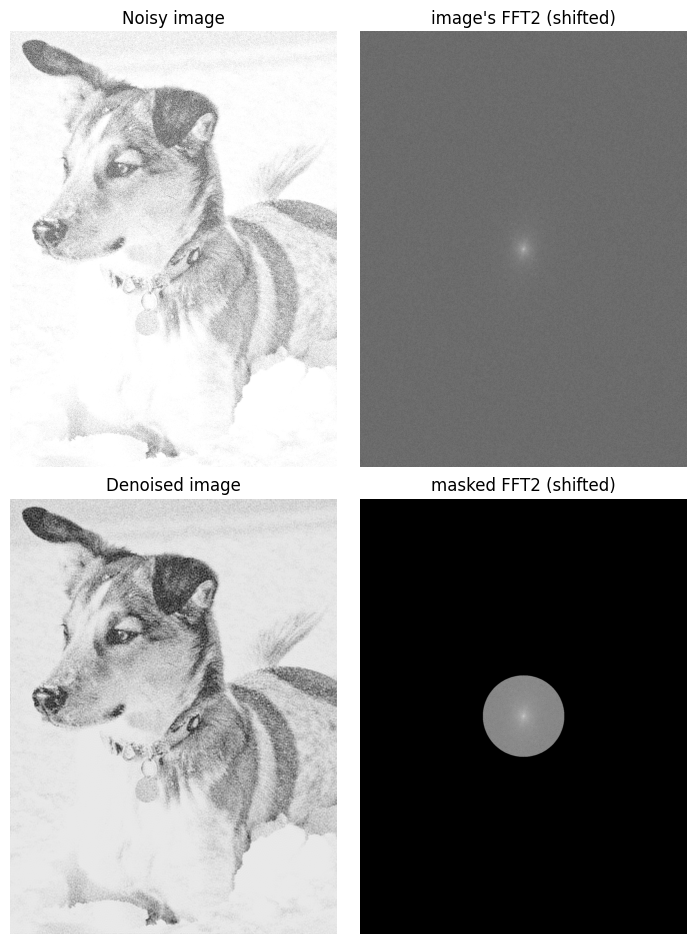

In [163]:

#img_noise = np.clip(img +200*np.random.randn(*img.shape),0,255).astype(np.uint8)
img = np.array(cv2.imread(r'../media/dog.jpg', 0), np.uint8)
# mean = 0
# stddev = 280
# noise = np.zeros(img.shape, np.uint8)
# cv2.randn(noise, mean, stddev)
noise = np.random.normal(loc = 0, scale=280, size = img.shape).astype(np.uint8)
img_noise = cv2.add(img, noise)

#img_noise = img + 200*np.random.randn(*img.shape).astype('uint8') 
fft_2D_noise = np.fft.fft2(img_noise)
#fft_2D_noise = fft_2D + 0.0003*np.max(fft_2D_abs)*np.random.randn(*fft_2D.shape)

fig_width = 7
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(fig_width, fig_width*aspect))
ax = ax.flatten()

ax[0].imshow(img_noise, 'grey')
ax[0].axis('off') 
ax[0].set_title('Noisy image')

ax[1].imshow(proc(fft_2D_noise), 'grey')
ax[1].axis('off') 
ax[1].set_title('image\'s FFT2 (shifted)')

mask = np.zeros(fft_2D_noise.shape)#;print(mask.shape)
mask = cv2.circle(mask, (w//2,h//2), w//8, 1,-1)
mask = np.fft.fftshift(mask.astype(float))

filtered_fft2 = fft_2D_noise*mask

img_filtered = np.fft.ifft2(filtered_fft2).real

ax[2].imshow(img_filtered, 'grey')
ax[2].axis('off') 
ax[2].set_title('Denoised image')

ax[3].imshow(proc(filtered_fft2), 'grey')
ax[3].axis('off') 
ax[3].set_title('masked FFT2 (shifted)')




